## Data Gathering

Import the necessary packages:

In [1]:
import pandas as pd
import numpy as np
import requests 
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

Upload the .csv file into the notebook:

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Upload the .tsv file stored in the url:

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url).text

predictions_df = pd.read_csv(url, sep = '\t')
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Additional data from the Twitter API:

In [4]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tweepy

consumer_key = '****'
consumer_secret = '****'
access_token = '****'
access_secret = '****'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
collected =[]
not_collected = [] # to avoid error/exception messages

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(archive_df['tweet_id']):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            collected.append(tweet_id)
        except Exception as e:
            not_collected.append(tweet_id)
    

In [8]:
tweet_df = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Acessing Data

We can see some basic informations for each dataset:

* For archive_df:

In [9]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
archive_df.isnull().sum() # number of missing values for each column

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* For predictions_df:

In [12]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [14]:
predictions_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

* For tweet_df:

In [15]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

With that basic insight, we can document some issues to be fixed in each]
dataset: 

### archive_df

* Quality issues:

1 - The columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id have many missing values 

2 - There are unnecessary columns

3 - The timestamp column is a string datatype

4 - The source column has only 4 possible values, which are not very clear, so it must be fixed

* Tidiness issues:

1 - Some missising values are represented by None

### predictions_df

* Quality issues:

1 - There are absurd for the columns p1, p2 and p3

2 - There are unnecessary columns

3 - There are less image predictions than the number of tweets in archive_df, which indicates missing data

* Tidiness issues:


1 - The label of the columns p1, p2 and p3 must be changed to be self-explanatory

### tweet_df

* Quality issues

1 - There are unnecessary columns

2 - Rename id column

## Cleaning data

First, we'll make a copy of each dataset:

In [16]:
archive_clean = archive_df.copy()
predictions_clean = predictions_df.copy()
tweet_clean = tweet_df.copy()

### archive_df

1 - Drop rows that are retweets (non-null values for the in_reply_to_status_id and in_reply_to_user_id)

In [17]:
archive_clean = archive_clean[pd.isnull(archive_clean.retweeted_status_id)]
archive_clean = archive_clean[pd.isnull(archive_clean.in_reply_to_status_id)]

In [19]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

2 - Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

In [20]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


3 - Change timestamp column datatype to datatime

In [22]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [23]:
archive_clean['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2097 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.8 KB


4 - Change the source column labels to some more descriptive and self explanatory

In [24]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

In [25]:
archive_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

5 - Replace all missing values for Nan

In [26]:
archive_clean = archive_clean.replace('None', np.NaN)

In [27]:
(archive_clean.values == 'None').sum() # make sure there are no None values

0

### predictions_df

1 - Drop values in p1 with absurd values (we will set the frequency of these less than 7)

In [28]:
predictions_clean = predictions_clean.groupby('p1').filter(lambda x: len(x) > 7)

In [29]:
predictions_clean['p1'].value_counts()

golden_retriever         150
Labrador_retriever       100
Pembroke                  89
Chihuahua                 83
pug                       57
                        ... 
Yorkshire_terrier          8
doormat                    8
English_setter             8
flat-coated_retriever      8
standard_poodle            8
Name: p1, Length: 64, dtype: int64

2 - Select the necessary columns

In [30]:
predictions_clean = predictions_clean.filter(['tweet_id','p1','p1_conf'] )

In [31]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 2 to 2073
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1415 non-null   int64  
 1   p1        1415 non-null   object 
 2   p1_conf   1415 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 44.2+ KB


4 - Rename the p1 column

In [32]:
predictions_clean = predictions_clean.rename(columns={'p1':'probability1_breed'})

In [33]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 2 to 2073
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1415 non-null   int64  
 1   probability1_breed  1415 non-null   object 
 2   p1_conf             1415 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 44.2+ KB


### tweet_df

Requirement: Remove rows with retweets

In [34]:
tweet_clean = tweet_clean[tweet_clean['retweeted_status'].isnull()]

In [35]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   id                             2175 non-null   int64              
 2   id_str                         2175 non-null   int64              
 3   full_text                      2175 non-null   object             
 4   truncated                      2175 non-null   bool               
 5   display_text_range             2175 non-null   object             
 6   entities                       2175 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2175 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

1 - Rename id column to tweet_id

In [36]:
tweet_clean = tweet_clean.rename(columns={'id':'tweet_id'})

In [37]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   tweet_id                       2175 non-null   int64              
 2   id_str                         2175 non-null   int64              
 3   full_text                      2175 non-null   object             
 4   truncated                      2175 non-null   bool               
 5   display_text_range             2175 non-null   object             
 6   entities                       2175 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2175 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

2 - Select the necessary columns

In [38]:
tweet_clean = tweet_clean.filter(['tweet_id','favorite_count','retweet_count', 'source', 'user'] )

In [39]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2175 non-null   int64 
 1   favorite_count  2175 non-null   int64 
 2   retweet_count   2175 non-null   int64 
 3   source          2175 non-null   object
 4   user            2175 non-null   object
dtypes: int64(3), object(2)
memory usage: 102.0+ KB


#### To finish the cleaning, we will merge the 3 datasets on tweet_id

In [40]:
merged_df = pd.merge(archive_clean, predictions_clean, how='outer', on=['tweet_id'])

In [41]:
merged_df = pd.merge(merged_df, tweet_clean, how = 'outer', on=['tweet_id'])

In [42]:
merged_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,probability1_breed,p1_conf,favorite_count,retweet_count,source_y,user
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,39467.0,8853.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,Chihuahua,0.323581,33819.0,6514.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,Chihuahua,0.716012,25461.0,4328.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,NaN,NaN,42908.0,8964.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,basset,0.555712,41048.0,9774.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Storing Data

In [49]:
merged_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

### Insights

1 - What are the 3 most appearing breeds in the dataset?

In [44]:
merged_df['probability1_breed'].value_counts()[0:3]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Name: probability1_breed, dtype: int64

2 - What is the most commom stage?

In [45]:
print(merged_df['doggo'].value_counts())
print(merged_df['floofer'].value_counts())
print(merged_df['pupper'].value_counts())
print(merged_df['puppo'].value_counts())

doggo    83
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    230
Name: pupper, dtype: int64
puppo    24
Name: puppo, dtype: int64


3 - What are the most commom names?

In [46]:
merged_df['name'].value_counts()[1:20]

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Sadie       8
Winston     8
the         8
Lola        8
Daisy       7
Toby        7
Bailey      6
Koda        6
Jax         6
Stanley     6
Bella       6
an          6
Bo          6
Name: name, dtype: int64

### Visualization

1 - How are the ratings distributed?

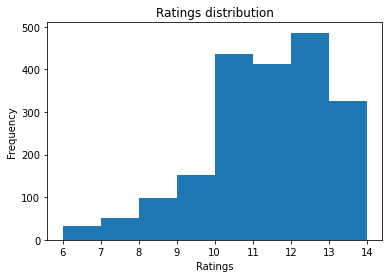

In [47]:
merged_df['rating_numerator'].plot(kind='hist', bins=[6,7,8,9,10,11,12,13,14])

plt.title('Ratings distribution')
plt.xlabel('Ratings');

In [48]:
merged_df['rating_numerator'].value_counts()

12.0      486
10.0      436
11.0      413
13.0      287
9.0       153
8.0        98
7.0        52
14.0       38
5.0        34
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
27.0        1
45.0        1
88.0        1
144.0       1
26.0        1
121.0       1
44.0        1
60.0        1
80.0        1
75.0        1
99.0        1
50.0        1
204.0       1
1776.0      1
165.0       1
0.0         1
84.0        1
24.0        1
420.0       1
Name: rating_numerator, dtype: int64